In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

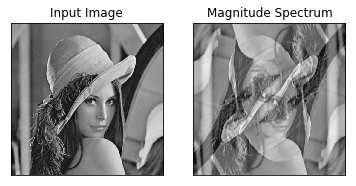

In [58]:
img = cv2.imread('image.jpg',0)
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

sobel_x_padded = np.zeros((512,512,2), np.uint8)

sobel_x_padded[:sobel_x.shape[0], :sobel_x.shape[1],0] = sobel_x


S = cv2.dft(np.float32(sobel_x_padded),flags = cv2.DFT_COMPLEX_OUTPUT)
S = np.fft.fftshift(S)

fshift = dft_shift*S

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


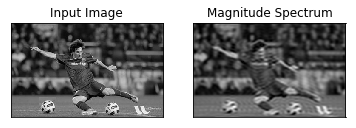

In [13]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
